In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [2]:
energy_df=df.drop([0, 1, 2, 4])

In [3]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [4]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [8]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [10]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [11]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [13]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [14]:
#Removing rows where all of the data is blank.
filtered_df2=filtered_df[((filtered_df['2001']!="--")&(filtered_df['2002']!="--")&
                         (filtered_df['2003']!="--")&(filtered_df['2004']!="--")&
                         (filtered_df['2005']!="--")&(filtered_df['2006']!="--")&
                         (filtered_df['2007']!="--")&(filtered_df['2008']!="--")&
                         (filtered_df['2009']!="--")&(filtered_df['2010']!="--")&
                         (filtered_df['2011']!="--")&(filtered_df['2012']!="--")&
                         (filtered_df['2013']!="--")&(filtered_df['2014']!="--")&
                         (filtered_df['2015']!="--")&(filtered_df['2016']!="--")&
                         (filtered_df['2017']!="--")&(filtered_df['2018']!="--")&
                         (filtered_df['2019']!="--"))]

filtered_df2

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [15]:
#create a dataframe for the East North Central region
ENC_df1=filtered_df2.loc[filtered_df2["Location"]=="East North Central"]
ENC_df1=ENC_df1.drop(columns=["source key", "units", "Location"])

ENC_df1=ENC_df1.set_index(["Renewable", "Energy_Source"]).sort_index()
ENC_df1

3                                               2001    2002    2003    2004  \
Renewable     Energy_Source                                                    
non-renewable  coal                           424791  439095  445150  449108   
               natural gas                     20992   30578   20720   22318   
               nuclear                        146040  145261  143377  150447   
               other                             341     660     477     379   
               other gases                       129     171     136     830   
               petroleum coke                    258     443     366    1816   
               petroleum liquids                2923    1894    2656    1957   
               wood and wood-derived fuels      1165    1064    1130    1250   
renewable      biomass                          2821    2753    2877    2899   
               conventional hydroelectric       4658    4966    4037    4617   
               hydro-electric pumped storage   -1127   -1036   -1017   -1113   
               other biomass                    1656    1688    1747    1649   
               other renewables                 2894    2799    2995    3083   
               wind                               73      47     118     184   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2005    2006    2007    2008  \
Renewable     Energy_Source                                                    
non-renewable  coal                           459078  451510  456905  456001   
               natural gas                     31749   25712   33643   23552   
               nuclear                        150858  152301  155920  156305   
               other                             293     261     248     257   
               other gases                       563     499     464     383   
               petroleum coke                   1654    1643    1541    1719   
               petroleum liquids                1620     927    1144     926   
               wood and wood-derived fuels      1250    1269    1239    1238   
renewable      biomass                          2723    3012    3021    3399   
               conventional hydroelectric       4046    4258    3594    3753   
               hydro-electric pumped storage   -1106   -1039   -1129    -916   
               other biomass                    1473    1743    1783    2161   
               other renewables                 2972    3384    3812    6618   
               wind                              249     373     791    3219   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2009    2010    2011    2012  \
Renewable     Energy_Source                                                    
non-renewable  coal                           412245  425653  394593  341389   
               natural gas                     25139   35231   45414   79181   
               nuclear                        145214  154900  155162  155808   
               other                             249     228     296     280   
               other gases                       219     405     386     673   
               petroleum coke                   1486    1595    2632    1980   
               petroleum liquids                 732     752     760     606   
               wood and wood-derived fuels      1111    1286    1459    1429   
renewable      biomass                          3409    3567    3876    3938   
               conventional hydroelectric       3796    4200    4254    3549   
               hydro-electric pumped storage    -857   -1023    -945    -773   
               other biomass                    2298    2281    2417    2510   
               other renewables                 8998   12441   15244   18604   
               wind                             5589    8847   11338   14598  

In [16]:
#refine the ENC dataframe so the annual data are the data rows
ENC_df1=ENC_df1.dropna()
ENC_df1=ENC_df1.astype(int)
ENC_df1=ENC_df1.T
ENC_df1

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2001                 424791        20992   146040    341          129   
2002                 439095        30578   145261    660          171   
2003                 445150        20720   143377    477          136   
2004                 449108        22318   150447    379          830   
2005                 459078        31749   150858    293          563   
2006                 451510        25712   152301    261          499   
2007                 456905        33643   155920    248          464   
2008                 456001        23552   156305    257          383   
2009                 412245        25139   145214    249          219   
2010                 425653        35231   154900    228          405   
2011                 394593        45414   155162    296          386   
2012                 341389        79181   155808    280          673   
2013                 368854        55362   153849    277         1724   
2014                 361841        56666   154835    229         1872   
2015                 310998        85612   154001    203         1983   
2016                 272319       107853   157128     84         2183   
2017                 274501        97032   156909     96         2275   
2018                 269192       131169   157024    104         2228   
2019                 218059       153887   158686     90         2327   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2001                      258               2923                         1165   
2002                      443               1894                         1064   
2003                      366               2656                         1130   
2004                     1816               1957                         1250   
2005                     1654               1620                         1250   
2006                     1643                927                         1269   
2007                     1541               1144                         1239   
2008                     1719                926                         1238   
2009                     1486                732                         1111   
2010                     1595                752                         1286   
2011                     2632                760                         1459   
2012                     1980                606                         1429   
2013                     2902                581                         1476   
2014                     2974                721                         1546   
2015                     2908                541                         1257   
2016                     2090                523                         1162   
2017                     2002                499                         1235   
2018                     2172                525                         1258   
2019                     1439                466                         1153   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2001               2821                        4658   
2002               2753                        4966   
2003               2877                        4037   
2004               2899                        4617   
2005               2723                        4046   
2006               3012                        4258   
2007               3021                        3594   
2008               3399                        3753   
2009 

In [17]:
#create a summary table for ENC energy production by source
ENC_sum=ENC_df1.agg(["mean", "std", "min", "max"])

ENC_quant=ENC_df1.quantile([.25, .5, .75])
ENC_sum=ENC_sum.append(ENC_quant)
ENC_sum

non-renewable                                                         \
               coal    natural gas        nuclear       other  other gases   
mean  380593.789474   56937.368421  152843.421053  265.894737  1023.684211   
std    77760.754904   40693.965690    4679.973852  138.812781   860.018156   
min   218059.000000   20720.000000  143377.000000   84.000000   129.000000   
max   459078.000000  153887.000000  158686.000000  660.000000  2327.000000   
0.25  326193.500000   25425.500000  150652.500000  215.500000   384.500000   
0.5   412245.000000   35231.000000  154835.000000  257.000000   563.000000   
0.75  447129.000000   82396.500000  156112.500000  294.500000  1927.500000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean     1769.473684        1092.263158                  1261.947368   
std       797.806881         753.108804                   130.523933   
min       258.000000         466.000000                  1064.000000   
max      2974.000000        2923.000000                  1546.000000   
0.25     1513.500000         561.000000                  1163.500000   
0.5      1719.000000         752.000000                  1250.000000   
0.75     2131.000000        1382.000000                  1277.500000   

        renewable                                                             \
          biomass  conventional hydroelectric  hydro-electric pumped storage   
mean  3457.684211                 4363.210526                    -892.368421   
std    506.185742                  491.353525                     189.811957   
min   2723.000000                 3549.000000                   -1129.000000   
max   4204.000000                 5216.000000                    -481.000000   
0.25  2955.500000                 4041.500000                   -1037.500000   
0.5   3567.000000                 4268.000000                    -916.000000   
0.75  3879.000000                 4752.000000                    -726.500000   

                                                     
      other biomass  other renewables          wind  
mean    2195.789474      14769.263158  11159.736842  
std      433.246476      11569.739356  10941.891665  
min     1473.000000       2799.000000     47.000000  
max     2686.000000      34668.000000  30313.000000  
0.25    1745.000000       3233.500000    311.000000  
0.5     2298.000000      12441.000000   8847.000000  
0.75    2570.500000      25785.500000  21487.500000

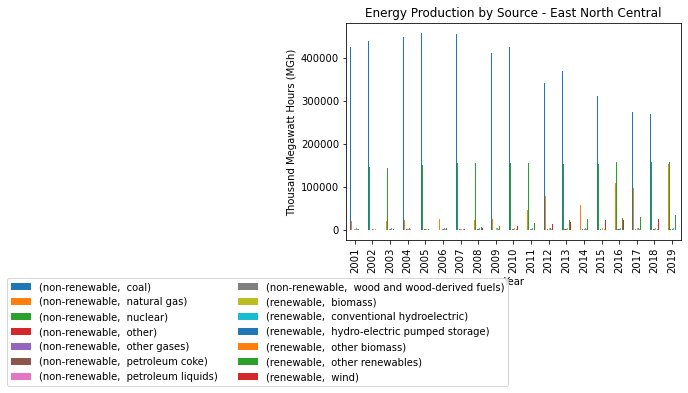

In [18]:
#create a plot showing energy production in the region over time
ENC_df1.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - East North Central")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [19]:
#create a dataframe for change in energy production for ENC
ENC_delta=ENC_df1.diff(axis=0)
ENC_delta=ENC_delta.drop("2001")
ENC_delta

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2002                14304.0       9586.0   -779.0  319.0         42.0   
2003                 6055.0      -9858.0  -1884.0 -183.0        -35.0   
2004                 3958.0       1598.0   7070.0  -98.0        694.0   
2005                 9970.0       9431.0    411.0  -86.0       -267.0   
2006                -7568.0      -6037.0   1443.0  -32.0        -64.0   
2007                 5395.0       7931.0   3619.0  -13.0        -35.0   
2008                 -904.0     -10091.0    385.0    9.0        -81.0   
2009               -43756.0       1587.0 -11091.0   -8.0       -164.0   
2010                13408.0      10092.0   9686.0  -21.0        186.0   
2011               -31060.0      10183.0    262.0   68.0        -19.0   
2012               -53204.0      33767.0    646.0  -16.0        287.0   
2013                27465.0     -23819.0  -1959.0   -3.0       1051.0   
2014                -7013.0       1304.0    986.0  -48.0        148.0   
2015               -50843.0      28946.0   -834.0  -26.0        111.0   
2016               -38679.0      22241.0   3127.0 -119.0        200.0   
2017                 2182.0     -10821.0   -219.0   12.0         92.0   
2018                -5309.0      34137.0    115.0    8.0        -47.0   
2019               -51133.0      22718.0   1662.0  -14.0         99.0   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2002                    185.0            -1029.0                       -101.0   
2003                    -77.0              762.0                         66.0   
2004                   1450.0             -699.0                        120.0   
2005                   -162.0             -337.0                          0.0   
2006                    -11.0             -693.0                         19.0   
2007                   -102.0              217.0                        -30.0   
2008                    178.0             -218.0                         -1.0   
2009                   -233.0             -194.0                       -127.0   
2010                    109.0               20.0                        175.0   
2011                   1037.0                8.0                        173.0   
2012                   -652.0             -154.0                        -30.0   
2013                    922.0              -25.0                         47.0   
2014                     72.0              140.0                         70.0   
2015                    -66.0             -180.0                       -289.0   
2016                   -818.0              -18.0                        -95.0   
2017                    -88.0              -24.0                         73.0   
2018                    170.0               26.0                         23.0   
2019                   -733.0              -59.0                       -105.0   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2002              -68.0                       308.0   
2003              124.0                      -929.0   
2004               22.0                       580.0   
2005             -176.0                      -571.0   
2006              289.0                       212.0   
2007                9.0                      -664.0   
2008              378.0                       159.0   
2009               10.0                        43.0   
2010              158.0                       404.0   
2011              309.0                        54.0   
2012               62.0                      -705

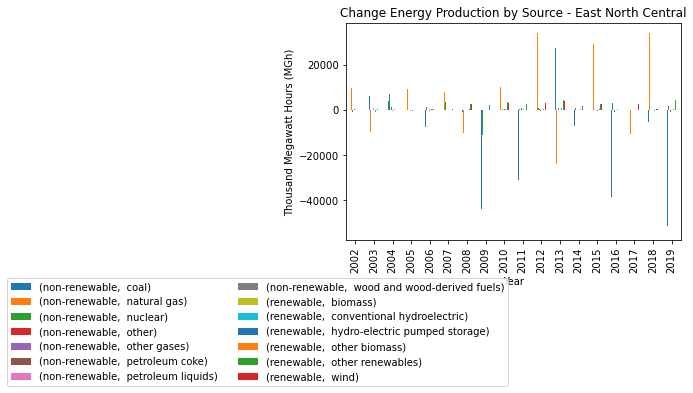

In [20]:
ENC_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - East North Central")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [21]:
#breakout out ENC dataframe to include renewable energy sources only
RE_ENC=ENC_df1.filter(like = "renewable", axis=0)
RE_ENC

Empty DataFrame
Columns: [(non-renewable,  coal), (non-renewable,  natural gas), (non-renewable,  nuclear), (non-renewable,  other), (non-renewable,  other gases), (non-renewable,  petroleum coke), (non-renewable,  petroleum liquids), (non-renewable,  wood and wood-derived fuels), (renewable,  biomass), (renewable,  conventional hydroelectric), (renewable,  hydro-electric pumped storage), (renewable,  other biomass), (renewable,  other renewables), (renewable,  wind)]
Index: []

In [22]:
#create a dataframe for the state of Michigan
MI_df=filtered_df2.loc[filtered_df2["Location"]=="Michigan"]
MI_df=MI_df.drop(columns=["source key", "units", "Location"])

MI_df=MI_df.set_index(["Renewable", "Energy_Source"]).sort_index()
MI_df

3                                              2001   2002   2003   2004  \
Renewable     Energy_Source                                                
non-renewable  coal                           67343  65649  66869  67749   
               natural gas                    12885  15387  11043  14228   
               nuclear                        26711  31087  27954  30562   
               other                            142    181    197    168   
               other gases                        6     10      2    599   
               petroleum coke                     1     35     26      8   
               petroleum liquids                733   1056    861    718   
               wood and wood-derived fuels     1103    992   1018   1105   
renewable      biomass                         1739   1610   1605   1643   
               conventional hydroelectric      1536   1640   1310   1509   
               hydro-electric pumped storage  -1127  -1036  -1017  -1113   
               other biomass                    636    618    587    537   
               other renewables                1739   1610   1608   1644   
               wind                               0      0      3      2   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2005   2006   2007   2008  \
Renewable     Energy_Source                                                
non-renewable  coal                           69634  67104  69944  68838   
               natural gas                    13455  11190  13009   9499   
               nuclear                        32872  29066  31517  31484   
               other                            183    170    173    183   
               other gases                      372    320    282    264   
               petroleum coke                    73     91    105     97   
               petroleum liquids                782    272    423    260   
               wood and wood-derived fuels     1064   1063   1014   1004   
renewable      biomass                         1630   1646   1570   1618   
               conventional hydroelectric      1433   1488   1244   1339   
               hydro-electric pumped storage  -1106  -1039  -1129   -916   
               other biomass                    566    583    556    614   
               other renewables                1631   1648   1573   1759   
               wind                               2      2      3    141   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2009   2010   2011   2012  \
Renewable     Energy_Source                                                
non-renewable  coal                           66251  65137  58501  52814   
               natural gas                     8302  12012  12554  21097   
               nuclear                        21851  29625  32889  28020   
               other                            201    187    183    183   
               other gases                      203    299    269    315   
               petroleum coke                    97     90     67     73   
               petroleum liquids                195    176    174    134   
               wood and wood-derived fuels      872    987    998    892   
renewable      biomass                         1550   1625   1665   1652   
               conventional hydroelectric      1347   1222   1328   1181   
               hydro-electric pumped storage   -857  -1023   -945   -773   
               other biomass                    678    638    667    760   
               other renewables                1851   1985   2121   2783   
               wind                             300    360    456   1132   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2013   2014   2015   2016  \
Renewable     Energy_Source                  

In [23]:
#refine the Michigan dataframe so the annual data are the data rows
MI_df=MI_df.dropna()
MI_df=MI_df.astype(int)
MI_df=MI_df.T
MI_df

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2001                  67343        12885    26711    142            6   
2002                  65649        15387    31087    181           10   
2003                  66869        11043    27954    197            2   
2004                  67749        14228    30562    168          599   
2005                  69634        13455    32872    183          372   
2006                  67104        11190    29066    170          320   
2007                  69944        13009    31517    173          282   
2008                  68838         9499    31484    183          264   
2009                  66251         8302    21851    201          203   
2010                  65137        12012    29625    187          299   
2011                  58501        12554    32889    183          269   
2012                  52814        21097    28020    183          315   
2013                  55951        11604    28921    153          957   
2014                  52646        11825    31246    184         1120   
2015                  52689        19216    29334    192         1213   
2016                  40433        28402    31552    142         1615   
2017                  41974        25139    32381    114         1652   
2018                  42257        29952    30479    112         1598   
2019                  37324        33226    32909     85         1697   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2001                        1                733                         1103   
2002                       35               1056                          992   
2003                       26                861                         1018   
2004                        8                718                         1105   
2005                       73                782                         1064   
2006                       91                272                         1063   
2007                      105                423                         1014   
2008                       97                260                         1004   
2009                       97                195                          872   
2010                       90                176                          987   
2011                       67                174                          998   
2012                       73                134                          892   
2013                      268                126                          904   
2014                      748                136                          988   
2015                      571                104                          776   
2016                      556                116                          821   
2017                      856                105                          861   
2018                      984                112                          890   
2019                      673                 90                          797   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2001               1739                        1536   
2002               1610                        1640   
2003               1605                        1310   
2004               1643                        1509   
2005               1630                        1433   
2006               1646                        1488   
2007               1570                        1244   
2008               1618                        1339   
2009 

In [24]:
#create a summary table for Michigan energy production by source
MI_sum=MI_df.agg(["mean", "std", "min", "max"])

MI_quant=MI_df.quantile([.25, .5, .75])
MI_sum=MI_sum.append(ENC_quant)
MI_sum

non-renewable                                                        \
               coal   natural gas        nuclear       other  other gases   
mean   58374.052632  16527.631579   30024.210526  164.894737   673.315789   
std    11163.431788   7461.618838    2675.585555   32.107276   616.881589   
min    37324.000000   8302.000000   21851.000000   85.000000     2.000000   
max    69944.000000  33226.000000   32909.000000  201.000000  1697.000000   
0.25  326193.500000  25425.500000  150652.500000  215.500000   384.500000   
0.5   412245.000000  35231.000000  154835.000000  257.000000   563.000000   
0.75  447129.000000  82396.500000  156112.500000  294.500000  1927.500000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean      285.210526         345.947368                   955.210526   
std       328.143529         314.018838                   101.272777   
min         1.000000          90.000000                   776.000000   
max       984.000000        1056.000000                  1105.000000   
0.25     1513.500000         561.000000                  1163.500000   
0.5      1719.000000         752.000000                  1250.000000   
0.75     2131.000000        1382.000000                  1277.500000   

        renewable                                                             \
          biomass  conventional hydroelectric  hydro-electric pumped storage   
mean  1657.421053                 1441.842105                    -892.368421   
std     70.522901                  146.466630                     189.811957   
min   1550.000000                 1181.000000                   -1129.000000   
max   1852.000000                 1650.000000                    -481.000000   
0.25  2955.500000                 4041.500000                   -1037.500000   
0.5   3567.000000                 4268.000000                    -916.000000   
0.75  3879.000000                 4752.000000                    -726.500000   

                                                     
      other biomass  other renewables          wind  
mean     702.157895       3518.842105   1844.000000  
std      120.961547       2366.238395   2305.249348  
min      537.000000       1573.000000      0.000000  
max      864.000000       7623.000000   5826.000000  
0.25    1745.000000       3233.500000    311.000000  
0.5     2298.000000      12441.000000   8847.000000  
0.75    2570.500000      25785.500000  21487.500000

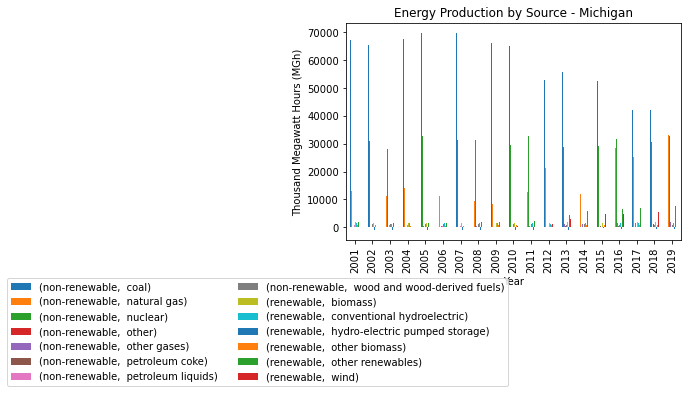

In [25]:
#create a plot showing energy production in the state over time
MI_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Michigan")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [21]:
#breakout the data from the East North Central Region into it's own dataframe
ENC_df=filtered_df2.loc[filtered_df2["Location"]=="East North Central"]

ENC_df=ENC_df.drop(columns=["source key", "units", "Location"])

ENC_df=ENC_df.set_index(["Energy_Source"])
ENC_df=ENC_df.dropna()
ENC_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
Energy_Source,,,,,,,,,,,,,,,,,,,,
coal,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
petroleum liquids,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466,non-renewable
petroleum coke,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
natural gas,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
other gases,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
nuclear,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686,non-renewable
conventional hydroelectric,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
other renewables,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
wind,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable


In [28]:
#refine the ENC dataframe so the annual data are the data rows
ENC_source=ENC_df.drop(columns="Renewable")
ENC_source=ENC_source.astype(int)
ENC_source=ENC_source.T

In [32]:
#create a summary table for ENC energy production by source
ENC_sum=ENC_source.agg(["mean", "std", "min", "max"])

ENC_sourcequant=ENC_source.quantile([.25, .5, .75])
ENC_source_sum=ENC_source_sum.append(ENC_sourcequant)
ENC_source_sum

Energy_Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
mean,380593.789474,1092.263158,1769.473684,56937.368421,1023.684211,152843.421053,4363.210526,14769.263158,11159.736842,3457.684211,1261.947368,2195.789474,-892.368421,265.894737
std,77760.754904,753.108804,797.806881,40693.965690,860.018156,4679.973852,491.353525,11569.739356,10941.891665,506.185742,130.523933,433.246476,189.811957,138.812781
min,218059.000000,466.000000,258.000000,20720.000000,129.000000,143377.000000,3549.000000,2799.000000,47.000000,2723.000000,1064.000000,1473.000000,-1129.000000,84.000000
max,459078.000000,2923.000000,2974.000000,153887.000000,2327.000000,158686.000000,5216.000000,34668.000000,30313.000000,4204.000000,1546.000000,2686.000000,-481.000000,660.000000
0.25,326193.500000,561.000000,1513.500000,25425.500000,384.500000,150652.500000,4041.500000,3233.500000,311.000000,2955.500000,1163.500000,1745.000000,-1037.500000,215.500000
0.5,412245.000000,752.000000,1719.000000,35231.000000,563.000000,154835.000000,4268.000000,12441.000000,8847.000000,3567.000000,1250.000000,2298.000000,-916.000000,257.000000
0.75,447129.000000,1382.000000,2131.000000,82396.500000,1927.500000,156112.500000,4752.000000,25785.500000,21487.500000,3879.000000,1277.500000,2570.500000,-726.500000,294.500000


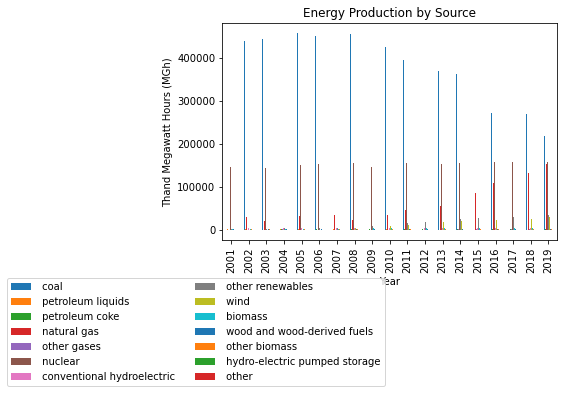

In [37]:
ENC_source.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thand Megawatt Hours (MGh)")
plt.title("Energy Production by Source")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [26]:
ENC_RE=ENC_df.groupby("")
ENC_RE.head()

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
Energy_Source,,,,,,,,,,,,,,,,,,,,
coal,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
petroleum liquids,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466,non-renewable
petroleum coke,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
natural gas,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
other gases,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
conventional hydroelectric,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
other renewables,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
wind,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable
biomass,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662,renewable


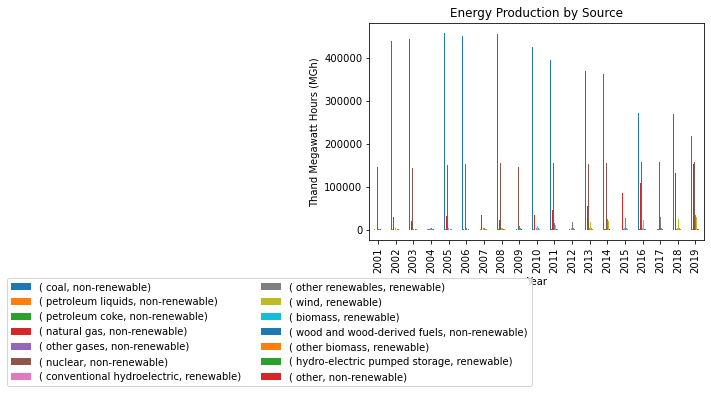

In [95]:
ENC_dfT=ENC_df.T
ENC_dfT.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thand Megawatt Hours (MGh)")
plt.title("Energy Production by Source")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [98]:
ENC_dfT.sort_index()

Energy_Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
Renewable,non-renewable,non-renewable,non-renewable,non-renewable,non-renewable,non-renewable,renewable,renewable,renewable,renewable,non-renewable,renewable,renewable,non-renewable
3,,,,,,,,,,,,,,
2001,424791,2923,258,20992,129,146040,4658,2894,73,2821,1165,1656,-1127,341
2002,439095,1894,443,30578,171,145261,4966,2799,47,2753,1064,1688,-1036,660
2003,445150,2656,366,20720,136,143377,4037,2995,118,2877,1130,1747,-1017,477
2004,449108,1957,1816,22318,830,150447,4617,3083,184,2899,1250,1649,-1113,379
2005,459078,1620,1654,31749,563,150858,4046,2972,249,2723,1250,1473,-1106,293
2006,451510,927,1643,25712,499,152301,4258,3384,373,3012,1269,1743,-1039,261
2007,456905,1144,1541,33643,464,155920,3594,3812,791,3021,1239,1783,-1129,248
2008,456001,926,1719,23552,383,156305,3753,6618,3219,3399,1238,2161,-916,257


In [42]:
#temp_df=ENC_df.drop(columns=["source key", "units", "Location", "Energy_Source", "Renewable"])
#temp_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
307,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
308,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
309,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
310,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
311,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
312,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
313,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
314,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
315,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
320,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [43]:
#temp_df=temp_df.rename_axis(None, axis=1)


In [44]:
#temp_df.reset_index(drop=True)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
1,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
2,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
3,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
4,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
5,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
6,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
7,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
8,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
9,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [47]:
#temp_df=temp_df.astype(int)

In [51]:
#temp_df.dtypes

In [50]:
ENC_delt=temp_df.diff(axis=1)

In [54]:
ENC_delt["Energy Source"]=ENC_df["Energy_Source"]
ENC_delt

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy Source
307,NaN,14304.0,6055.0,3958.0,9970.0,-7568.0,5395.0,-904.0,-43756.0,13408.0,-31060.0,-53204.0,27465.0,-7013.0,-50843.0,-38679.0,2182.0,-5309.0,-51133.0,coal
308,NaN,-1029.0,762.0,-699.0,-337.0,-693.0,217.0,-218.0,-194.0,20.0,8.0,-154.0,-25.0,140.0,-180.0,-18.0,-24.0,26.0,-59.0,petroleum liquids
309,NaN,185.0,-77.0,1450.0,-162.0,-11.0,-102.0,178.0,-233.0,109.0,1037.0,-652.0,922.0,72.0,-66.0,-818.0,-88.0,170.0,-733.0,petroleum coke
310,NaN,9586.0,-9858.0,1598.0,9431.0,-6037.0,7931.0,-10091.0,1587.0,10092.0,10183.0,33767.0,-23819.0,1304.0,28946.0,22241.0,-10821.0,34137.0,22718.0,natural gas
311,NaN,42.0,-35.0,694.0,-267.0,-64.0,-35.0,-81.0,-164.0,186.0,-19.0,287.0,1051.0,148.0,111.0,200.0,92.0,-47.0,99.0,other gases
312,NaN,-779.0,-1884.0,7070.0,411.0,1443.0,3619.0,385.0,-11091.0,9686.0,262.0,646.0,-1959.0,986.0,-834.0,3127.0,-219.0,115.0,1662.0,nuclear
313,NaN,308.0,-929.0,580.0,-571.0,212.0,-664.0,159.0,43.0,404.0,54.0,-705.0,719.0,596.0,-256.0,608.0,-370.0,-423.0,525.0,conventional hydroelectric
314,NaN,-95.0,196.0,88.0,-111.0,412.0,428.0,2806.0,2380.0,3443.0,2803.0,3360.0,4263.0,1712.0,2413.0,55.0,3056.0,413.0,4152.0,other renewables
315,NaN,-26.0,71.0,66.0,65.0,124.0,418.0,2428.0,2370.0,3258.0,2491.0,3260.0,3982.0,1591.0,2633.0,148.0,2753.0,379.0,4229.0,wind
320,NaN,-68.0,124.0,22.0,-176.0,289.0,9.0,378.0,10.0,158.0,309.0,62.0,224.0,42.0,-275.0,-181.0,134.0,-68.0,-152.0,biomass


In [70]:
ENC_delt=ENC_delt.set_index("Energy Source")

In [71]:
ENC_delta=ENC_delt.T

In [72]:
ENC_delta

Energy Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,14304.0,-1029.0,185.0,9586.0,42.0,-779.0,308.0,-95.0,-26.0,-68.0,-101.0,32.0,91.0,319.0
2003,6055.0,762.0,-77.0,-9858.0,-35.0,-1884.0,-929.0,196.0,71.0,124.0,66.0,59.0,19.0,-183.0
2004,3958.0,-699.0,1450.0,1598.0,694.0,7070.0,580.0,88.0,66.0,22.0,120.0,-98.0,-96.0,-98.0
2005,9970.0,-337.0,-162.0,9431.0,-267.0,411.0,-571.0,-111.0,65.0,-176.0,0.0,-176.0,7.0,-86.0
2006,-7568.0,-693.0,-11.0,-6037.0,-64.0,1443.0,212.0,412.0,124.0,289.0,19.0,270.0,67.0,-32.0
2007,5395.0,217.0,-102.0,7931.0,-35.0,3619.0,-664.0,428.0,418.0,9.0,-30.0,40.0,-90.0,-13.0
2008,-904.0,-218.0,178.0,-10091.0,-81.0,385.0,159.0,2806.0,2428.0,378.0,-1.0,378.0,213.0,9.0
2009,-43756.0,-194.0,-233.0,1587.0,-164.0,-11091.0,43.0,2380.0,2370.0,10.0,-127.0,137.0,59.0,-8.0
2010,13408.0,20.0,109.0,10092.0,186.0,9686.0,404.0,3443.0,3258.0,158.0,175.0,-17.0,-166.0,-21.0


<AxesSubplot:>

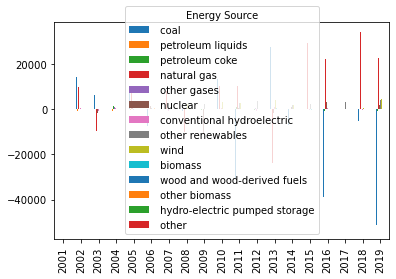

In [74]:
ENC_delta.plot(kind="bar")

In [63]:
#ENCcolumns=ENC_delt.columns
#ENCcolumns.values

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Energy Source'], dtype=object)

In [ ]:
ENC2001

In [66]:
ENC_delt.plot(kind="bar", x=ENC_delt["2001"], y=ENC_delt["Energy Source"])

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan],\n             dtype='float64')] are in the [columns]"

In [17]:
ENC_df.diff(axis=1) #create a new dataframe for delta

TypeError: unsupported operand type(s) for -: 'NoneType' and 'str'